### This document serves to pull relevant files from the data repository for exploratory data analysis. 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import os 
import geopandas
import matplotlib.pyplot as plt

In [2]:
# list available data source folders
main_folder = 'USDA-AMS-Data-and-Metrics'
folders = os.listdir(main_folder)
print(folders)

['.git', '.gitignore', 'Business Development and Infrastructure', 'CODE_OF_CONDUCT.txt', 'Food Access', 'Grants', 'Indicators of Community Wealth', 'Labor', 'LICENSE.txt', 'Local Food Sales', 'metadata_all_files.csv', 'Point level data', 'README.md']


In [3]:
metadata = pd.read_csv(main_folder + "/" +  'metadata_all_files.csv')
metadata

,2 pager title,category,topic_area,variable_name,user_friendly_variable_name,variable_definition,periodicity,aggregation_method,format,source,url,last_update_date,general_comments,Libby notes
0,Nutrition Security and Food Access,Food Access,Federal Nutrition Program,snap_par_all_eligible_people,"SNAP participation rates, all eligible people",Percent of eligible people participating in SNAP,Yearly,Percent,percent,USDA Food and Nutrition Service,https://www.fns.usda.gov/usamap,9/23/22,two years available but only have access to one,Corrected spelling in definition
1,Nutrition Security and Food Access,Food Access,Federal Nutrition Program,snap_par_elderly_people,"SNAP participation rates, elderly people",Percent of elderly people participating in SNAP,Yearly,Percent,percent,USDA Food and Nutrition Service,https://www.fns.usda.gov/usamap,9/23/22,two years available but only have access to one,NaN
2,Nutrition Security and Food Access,Food Access,Federal Nutrition Program,snap_par_working_poor_people,"SNAP participation rates, working poor people",Percent of working poor people participating i...,Yearly,Percent,percent,USDA Food and Nutrition Service,https://www.fns.usda.gov/usamap,9/23/22,two years available but only have access to one,NaN
3,Nutrition Security and Food Access,Food Access,Federal Nutrition Program,SNAP_percent_white_alone,"SNAP participation rate, White alone",Percent of eligible white only households part...,Yearly,Percent,percent,U.S. Census Bureau American Community Survey,https://data.census.gov/cedsci/table?q=food%20...,9/23/22,NaN,NaN
4,Nutrition Security and Food Access,Food Access,Federal Nutrition Program,SNAP_percent_black_alone,"SNAP participation rate, Black or African Amer...",Percent of eligible black only households part...,Yearly,Percent,percent,U.S. Census Bureau American Community Survey,https://data.census.gov/cedsci/table?q=food%20...,9/23/22,NaN,Corrected spelling in definition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Local Food Sales,Food Retail,General DTC,d2c_only_p,"Farms, percent selling direct-to-consumer only",Percent of farms selling direct-to-consumer only,Every 5 years,Percent,percent,"USDA National Agricultural Statistical Survey,...",restricted access data,9/23/22,All data was compiled using restricted access ...,NaN
517,Local Food Sales,Food Retail,General DTC,intermediated_only_p,"Farms, percent selling intermediated only",Percent of farms selling intermediated only,Every 5 years,Percent,percent,"USDA National Agricultural Statistical Survey,...",restricted access data,9/23/22,All data was compiled using restricted access ...,NaN
518,Local Food Sales,Food Retail,General DTC,d2c_intermediated_p,"Farms, percent selling direct and intermediated",Percent of farms selling direct and intermedia...,Every 5 years,Percent,percent,"USDA National Agricultural Statistical Survey,...",restricted access data,9/23/22,All data was compiled using restricted access ...,NaN
519,Local Food Sales,Food Retail,General DTC,local_p,"Farms, percent selling through local marketing...",Percent of farms selling through local marketi...,Every 5 years,Percent,percent,"USDA National Agricultural Statistical Survey,...",restricted access data,9/23/22,All data was compiled using restricted access ...,NaN


In [9]:
# for now, choose one file to explore. We will start with the first folder, business development and infrastructure.
# Use os to see the file name and pandas to pull the file into the notebook. 
dataframes = []
for folder in os.listdir(main_folder):
    if "." not in folder:
        subfolder = os.path.join(main_folder, folder)
        # Iterate through files within each subfolder
        for file in os.listdir(subfolder):
            if file.endswith(".csv"):
                file_path = os.path.join(subfolder, file)
                # Read CSV file into a DataFrame
                try: 
                    df = pd.read_csv(file_path)
                    df.set_index('fips', inplace=True)
                except: 
                    pass
                
                # Set FIPS code as the index of the DataFrame
                # Append DataFrame to the list
                dataframes.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes)


In [10]:
combined_df

,county_name,state_name,category,topic_area,year,variable_name,value
fips,,,,,,,
4013,Maricopa County,Arizona,Processing & Distribution,Food hubs,2022,number_food_hubs,1.000000
6057,Nevada County,California,Processing & Distribution,Food hubs,2022,number_food_hubs,1.000000
6073,San Diego County,California,Processing & Distribution,Food hubs,2022,number_food_hubs,1.000000
6075,San Francisco County,California,Processing & Distribution,Food hubs,2022,number_food_hubs,1.000000
8003,Alamosa County,Colorado,Processing & Distribution,Food hubs,2022,number_food_hubs,1.000000
...,...,...,...,...,...,...,...
0,NaN,NaN,Food Retail,General DTC,2017,d2c_only_p,0.055802
0,NaN,NaN,Food Retail,General DTC,2017,intermediated_only_p,0.006304
0,NaN,NaN,Food Retail,General DTC,2017,d2c_intermediated_p,0.007875


In [19]:
df = combined_df.groupby("variable_name").describe()

In [20]:
df

value                           \
                                      count      mean       std  min   
variable_name                                                          
SNAP_percent_asian_alone            12871.0  0.008013  0.024601  0.0   
SNAP_percent_black_alone            12871.0  0.149771  0.224693  0.0   
SNAP_percent_hispanic_any_race      12871.0  0.128819  0.218727  0.0   
SNAP_percent_indian_alone           12871.0  0.029908  0.108036  0.0   
SNAP_percent_native_hawaiian_alone  12871.0  0.001291  0.017329  0.0   
...                                     ...       ...       ...  ...   
work_outside_state_female           12880.0  3.445551  7.164722  0.0   
work_outside_state_female_pct       12880.0  0.001448  0.006142  0.0   
work_outside_state_male             12880.0  5.248331  8.227755  0.0   
work_outside_state_male_pct         12880.0  0.001864  0.006412  0.0   
work_outside_state_pct              12880.0  0.000846  0.002983  0.0   

                                                                             
                                         25%       50%       75%        max  
variable_name                                                                
SNAP_percent_asian_alone            0.000000  0.000000  0.005000   0.379000  
SNAP_percent_black_alone            0.000000  0.033000  0.208000   1.000000  
SNAP_percent_hispanic_any_race      0.010000  0.042000  0.127000   1.000000  
SNAP_percent_indian_alone           0.000000  0.002000  0.013000   1.000000  
SNAP_percent_native_hawaiian_alone  0.000000  0.000000  0.000000   1.000000  
...                                      ...       ...       ...        ...  
work_outside_state_female           0.200000  0.700000  2.800000  61.900000  
work_outside_state_female_pct       0.000009  0.000081  0.000634   0.204967  
work_outside_state_male             1.000000  2.100000  5.600000  67.900000  
work_outside_state_male_pct         0.000069  0.000312  0.001365   0.209677  
work_outside_state_pct              0.000029  0.000126  0.000561   0.091209  

[505 rows x 8 columns]

In [12]:
variables = combined_df["variable_name"].unique()
print(variables)

['number_food_hubs' 'number_meat_processors'
 'number_colleges_universities' 'serve_local_food' 'salad_bar'
 'local_salad_bar' 'local_food_cost' 'school_garden'
 'public_refrigerated_warehouses'
 'private_semi_private_refrigerated_warehouses'
 'work_inside_state_out_of_county' 'work_outside_state'
 'work_outside_place_of_residence' 'work_inside_state_out_of_county_male'
 'work_outside_state_male' 'work_outside_place_of_residence_male'
 'work_inside_state_out_of_county_female' 'work_outside_state_female'
 'work_outside_place_of_residence_female'
 'work_inside_state_out_of_county_pct' 'work_outside_state_pct'
 'work_outside_place_of_residence_pct'
 'work_inside_state_out_of_county_male_pct' 'work_outside_state_male_pct'
 'work_outside_place_of_residence_male_pct'
 'work_inside_state_out_of_county_female_pct'
 'work_outside_state_female_pct'
 'work_outside_place_of_residence_female_pct' 'disability_total'
 'disability_male' 'disability_female' 'disability_white_alone'
 'disability_black_o

C:\Users\NDSU-Prof\AppData\Local\Temp\ipykernel_17276\1481078564.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.log(data[data["variable_name"] == variable][data["value"] < three_sigma]["value"]).hist(bins=20, ax = axs[i])


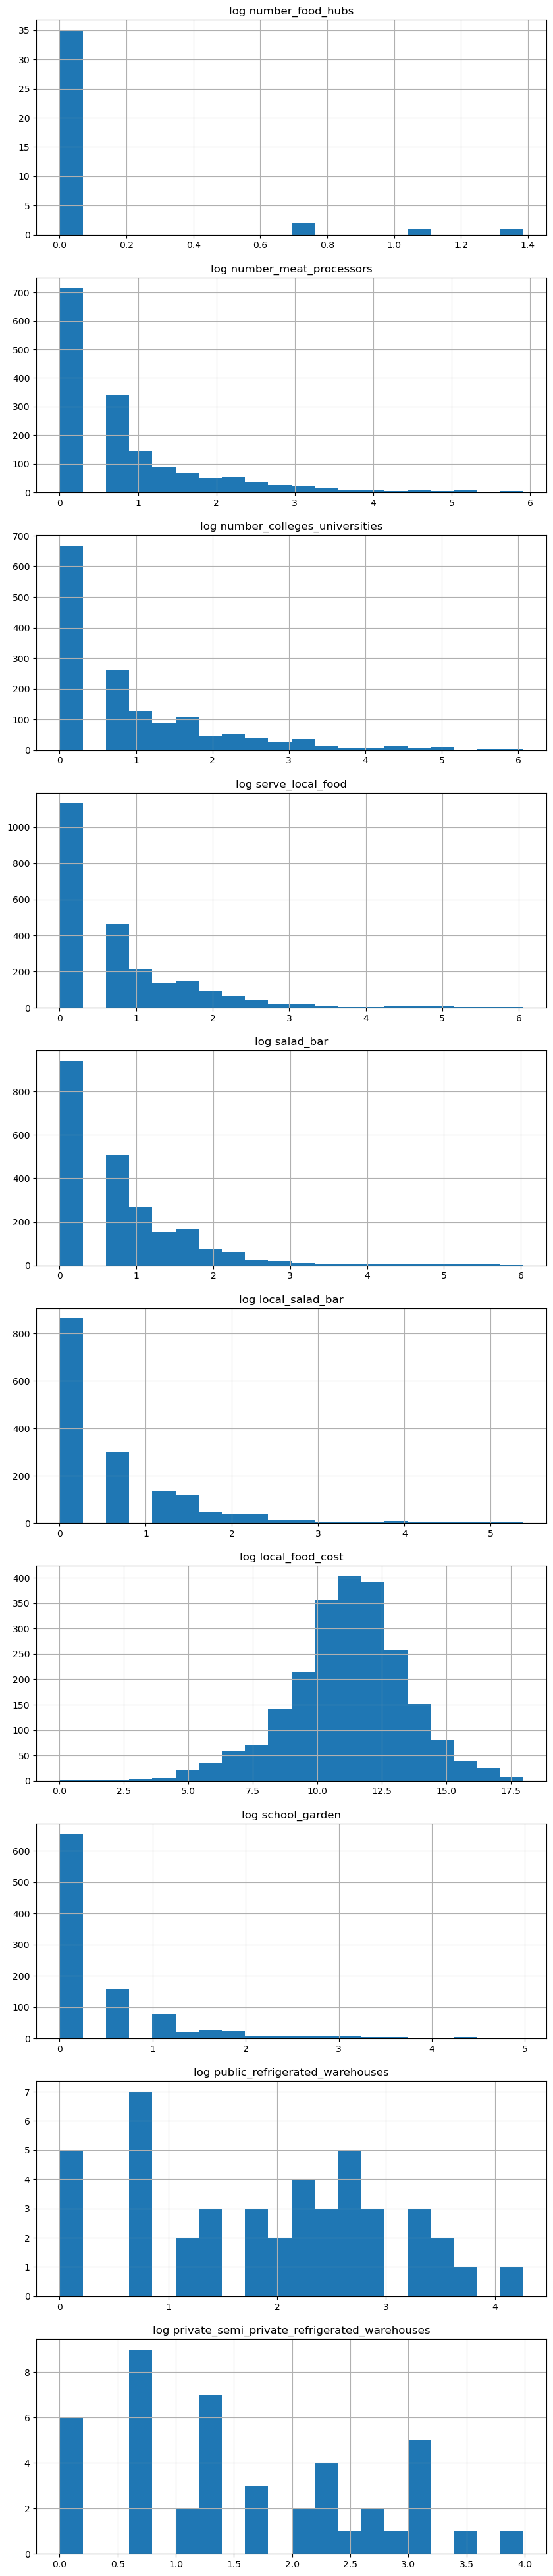

In [57]:
fig, axs = plt.subplots(len(variables), 1, figsize = (10, 5*len(variables)))
for i, variable in enumerate(variables): 
    mean_val = data[data["variable_name"] == variable]["value"].mean()
    st_dev = data[data["variable_name"] == variable]["value"].std()
    three_sigma =  mean_val + 3*st_dev
    np.log(data[data["variable_name"] == variable][data["value"] < three_sigma]["value"]).hist(bins=20, ax = axs[i])
    axs[i].set_title("log " + variable)

In [ ]:
file2 = folder + 